<center>
<img src="https://i.imgur.com/DW7NRwf.png" title="ElementalsAI" width=80%/>
</center>

# Introduction

Deep Learning has been very successful in solving many complex problems in the real world. However, solving most of these challenges requires data. Additionally, having data is not just enough. The data has to be cleansed, annotated, and organized. Moreover, data in many domains is not accessible due to privacy constraints (Especially in the medical domain). Hence it becomes pertinent to create models that can learn from a limited amount of data.

<br>

## Problem Statement:
In this task, you are given a small dataset of the microscopic view of the cells.

*Your goal is to build a model that accurately predicts the cell regions as shown in the **Label Image**.*

#### **Input Image**

<a href="https://imgur.com/aLDNHwu"><img src="https://i.imgur.com/aLDNHwu.png" title="source: imgur.com" /></a>

#### **Label Image**

<a href="https://imgur.com/s1mIkFE"><img src="https://i.imgur.com/s1mIkFE.png" title="source: imgur.com" /></a>


## Dataset:

The dataset contains 30 training images along with the labels.

[**Dataset Link**](https://drive.google.com/drive/folders/1678Tggykj46SpJZS9mKMKHw7YFmiGMc8?usp=sharing)


## Evaluation

Share the submission Jupyter/Colab notebook with the relevant explanation. code and models. We will evaluate your model on our **test dataset**.

<br><br>
****Note that this is an interview assignment & is not involved in the development of any software or solution.**

### Instructions

1. Make a copy of this notebook to start editing & add your solution.
2. A dataset folder has been shared with you to train and test.
2. You can use any framework to develop the solution (Pytorch, Keras, Tensorflow, Theano, Caffe etc.).
3. This assignment is a great medium to get to know you better. Please feel free to connect, interact & develop the solution. I would be more than willing to help you out in any issues or problems that you face while solving the challenge. You can connect with me at suraj.donthi@elementals.ai.
4. The goal of this task is to understand how you approach solving a problem. The more you connect while developing the solution the better I will be able to understand you.
5. Submission Files:
    - Colab Notebook Link with Solutions Approach and Code Solution.
    - Trained Model Link.
    - Any other necessary files.
5. **Submission deadline: Within 5 days of recieving the assignment, no later than 12 AM IST on the due date. The exact due date shall be mentioned in the email or the portal where you recieve the assignment.** (You can share the Colab Notebook to the gmail address surajdonthi.th@gmail.com)

## Explain the technique you will use to solve the problem in detail.

- Include any model architectures, equations, diagrams etc. that is required to explain how you are going to solve the problem.

================== `Your answer here. (Double click to edit)` ==================

I have take the Referance from the Image-to-Image Translation with Conditional Adversarial Networks Research Paper

https://drive.google.com/file/d/1ybHoVGYMk0zWEcecepk8jjdRk8ep7gDu/view?usp=sharing

GANs are generative models that learn a mapping from random noise vector z to output image y, G : z → y .
In contrast, conditional GANs learn a mapping from observed image x and random noise vector z, to y, G : {x, z} → y. The generator G is trained to produce outputs that cannot be distinguished from “real” images by an adversarially trained discriminator, D, which is trained to do as well as possible
at detecting the generator’s “fakes”.



I have take generator and discriminator architectures from those Both generator and discriminator use modules of the form convolution-BatchNorm-ReLu.

Details of the architecture are provided in the research paper

The below is the archtecture i have used to generate label images.

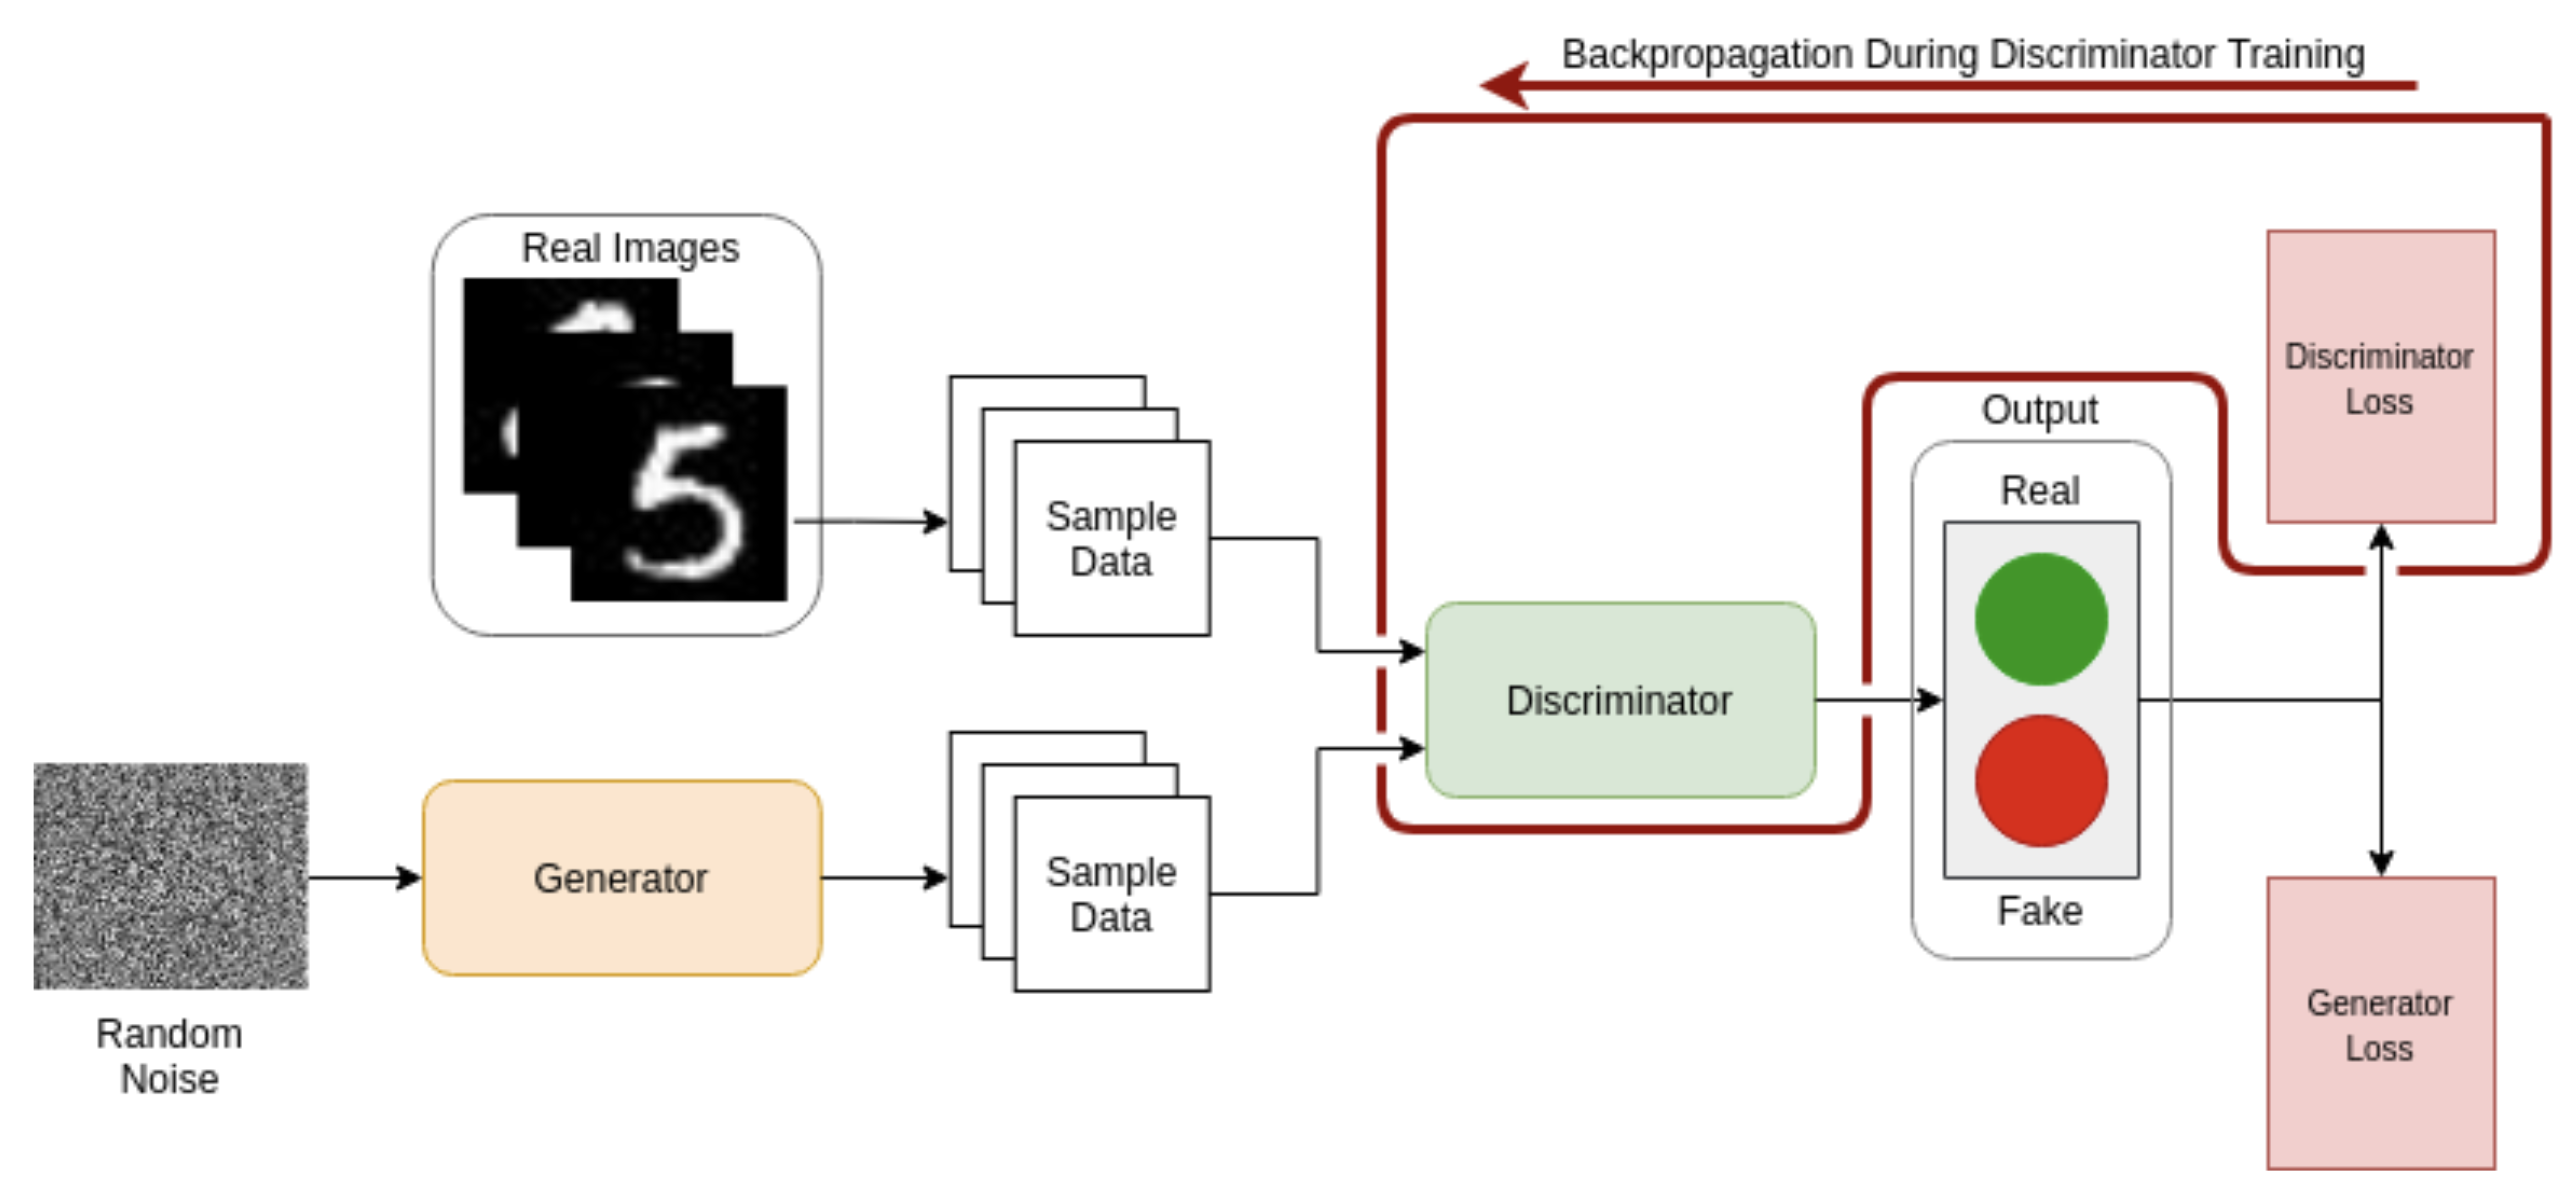

In this paper, we explore GANs in the conditional setting. Just as GANs learn a generative model of data, condi-
tional GANs (cGANs) learn a conditional generative model

[24]. This makes **cGANs suitable for image-to-image translation** tasks, where we condition on an input image and gen-
erate a corresponding output image.

Our method also differs from the prior works in several
architectural choices for the generator and discriminator.
Unlike past work, **for our generator we use a “U-Net”-based architecture** [50], and **for our discriminator we use a convolutional “PatchGAN” classifier**, which only penalizes struc-
ture at the scale of image patches. A similar PatchGAN ar-
chitecture was previously proposed in [38] to capture local

style statistics. Here we show that this approach is effective
on a wider range of problems, and we investigate the effect
of changing the patch size.

### **Optimization and inference**

To optimize our networks, we follow the standard ap-
proach from [24]: **we alternate between one gradient descent step on D, then one step on G**. As suggested in

the original GAN paper, rather than training G to mini-
mize log(1 − D(x, G(x, z)), we instead train to maximize

log D(x, G(x, z)) [24]. In addition, we divide the objec-
tive by 2 while optimizing D, which slows down the rate at

which D learns relative to G. We use minibatch SGD and
apply the **Adam solver [32], with a learning rate of 0.0002,and momentum parameters β1 = 0.5, β2 = 0.999.**
At inference time, we run the generator net in exactly
the same manner as during the training phase. This differs
from the usual protocol in that we apply dropout at test time,
and we apply batch normalization [29] using the statistics of

the test batch, rather than aggregated statistics of the train-
ing batch. This approach to batch normalization, when the

**batch size is set to 1**, has been termed “instance normal-
ization” and** has been demonstrated to be effective at image generation tasks** [54]. In our experiments, we use batch

sizes between 1 and 10 depending on the experiment.

## Implement the solution below.

In [ ]:
# Your code here.

### **Import Some Liberary**

In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from glob import glob
import tensorflow as tf

### ***Load the Images Data***

In [ ]:
images=glob("/content/drive/MyDrive/data/intern/cv med/train-volume/*.tif")

In [ ]:
len(images)

30

In [ ]:
labels=glob("/content/drive/MyDrive/data/intern/cv med/train-labels/*.tif")

In [ ]:
len(labels)

30

In [ ]:
img=cv2.imread(images[2])

In [ ]:
img.shape

(512, 512, 3)

### **Image visualization**

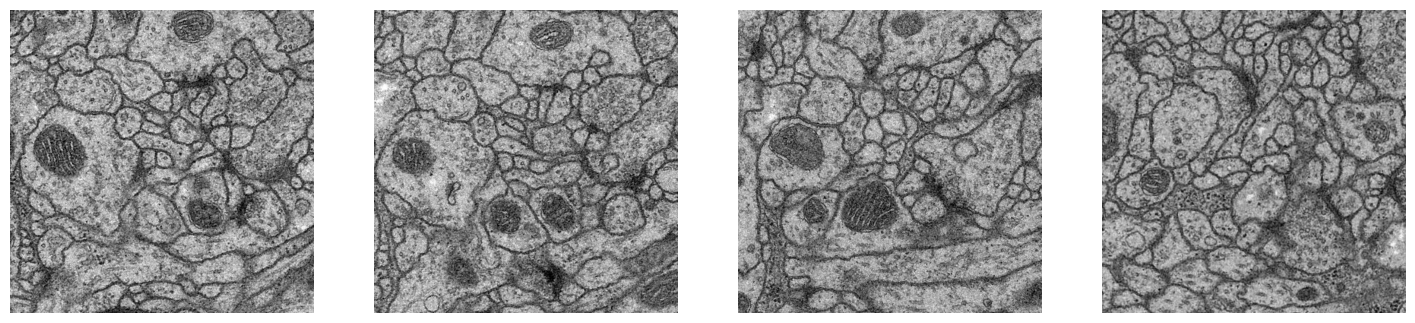

In [ ]:
plt.figure(figsize=(18, 18))
for i in range(4):
    ax = plt.subplot(1,4, i + 1)
    img_name=images[i]
    img=cv2.imread(img_name)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)

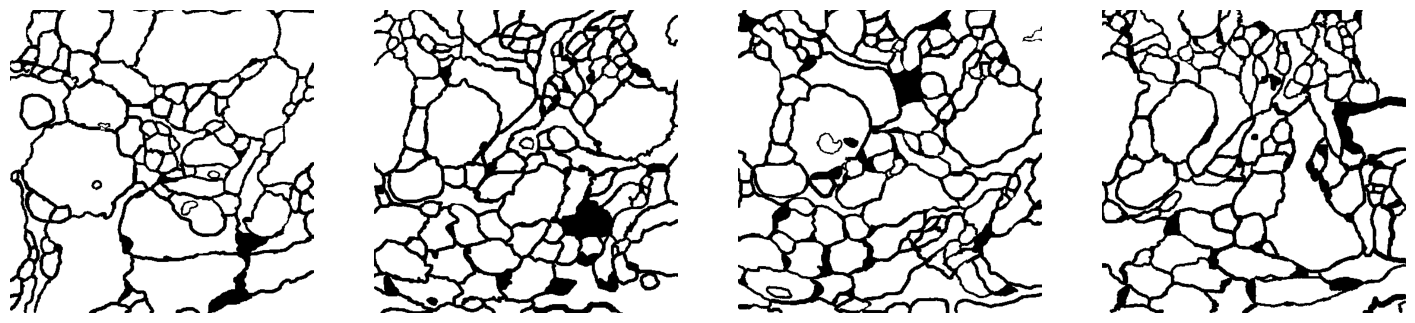

In [ ]:
plt.figure(figsize=(18, 18))
for i in range(4):
    ax = plt.subplot(1,4, i + 1)
    img_name=labels[i]
    img=cv2.imread(img_name)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
images

['/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_29.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_27.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_19.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_6.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_5.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_24.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_8.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_25.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_20.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_2.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_22.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume/train-volume_17.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-volume

In [ ]:
labels

['/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_24.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_4.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_2.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_7.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_29.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_19.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_17.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_3.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_8.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_13.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_6.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/train-labels_20.tif',
 '/content/drive/MyDrive/data/intern/cv med/train-labels/t

In [ ]:
images_features={}
for i in images:
    img=cv2.imread(i)
    img_name=i.split("_")[-1]
    images_features[img_name]=img

In [ ]:
labels_features={}
for i in labels:
    img=cv2.imread(i)
    img_name=i.split("_")[-1]
    labels_features[img_name]=img

### **Generate Numpy Array of Image**

In [ ]:
def generator(photo, label):

    X = []
    y = []

    for k, v in label.items():
        X.append(photo[k])
        y.append(label[k])
    return X, y

In [ ]:
X,y=generator(images_features,labels_features)

In [ ]:
X = np.array(X)

In [ ]:
y=np.array(y)

### **Model Building**
# Taken Referance from the Image-to-Image Translation with Conditional Adversarial Networks Research Paper

https://drive.google.com/file/d/1ybHoVGYMk0zWEcecepk8jjdRk8ep7gDu/view?usp=sharing

In [ ]:
from numpy import zeros
from numpy import ones
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model


In [ ]:
def discriminator(image_shape):
    #weight initilazation
    init = RandomNormal(stddev=0.02)

    #image input
    input_image = Input(shape=image_shape)
    #label input
    label_image = Input(shape=image_shape)

    #concatenate image
    merged = Concatenate()([input_image,label_image])

    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)

    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)

    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)

    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)

    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)

    model = Model([input_image, label_image], patch_out)
    # compile model
    #The model is trained with a batch size of one image and Adam optimizer.
    #with a small learning rate and 0.5 beta.
    #I have define the loss for the discriminator is weighted by 50% for each model updation.

    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

In [ ]:
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

In [ ]:
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

In [ ]:
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)

	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)

	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(image_shape[2], (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7) #Modified
	out_image = Activation('tanh')(g)  #Generates images in the range -1 to 1. So change inputs also to -1 to 1
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False       #Descriminator layers set to untrainable in the combined GAN but
                                          #standalone descriminator will be trainable.

	# define the source image
	in_src = Input(shape=image_shape)
	# suppy the image as input to the generator
	gen_out = g_model(in_src)
	# supply the input image and generated image as inputs to the discriminator
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and disc. output as outputs
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)

    #Total loss is the weighted sum of adversarial loss (BCE) and L1 loss (MAE)
    #Authors suggested weighting BCE vs L1 as 1:100.
	model.compile(loss=['binary_crossentropy', 'mae'],
               optimizer=opt, loss_weights=[1,100],metrics=['accuracy'])
	return model

In [ ]:
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [ ]:
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [ ]:
gen_loss=[]
acc=[]
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ ,_,accuracy= gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		gen_loss.append(g_loss)
		acc.append(accuracy)
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# Save the model after train
	g_model.save("model.h5")

In [ ]:
image_shape=(512,512,3)

In [ ]:
d_model = discriminator(image_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


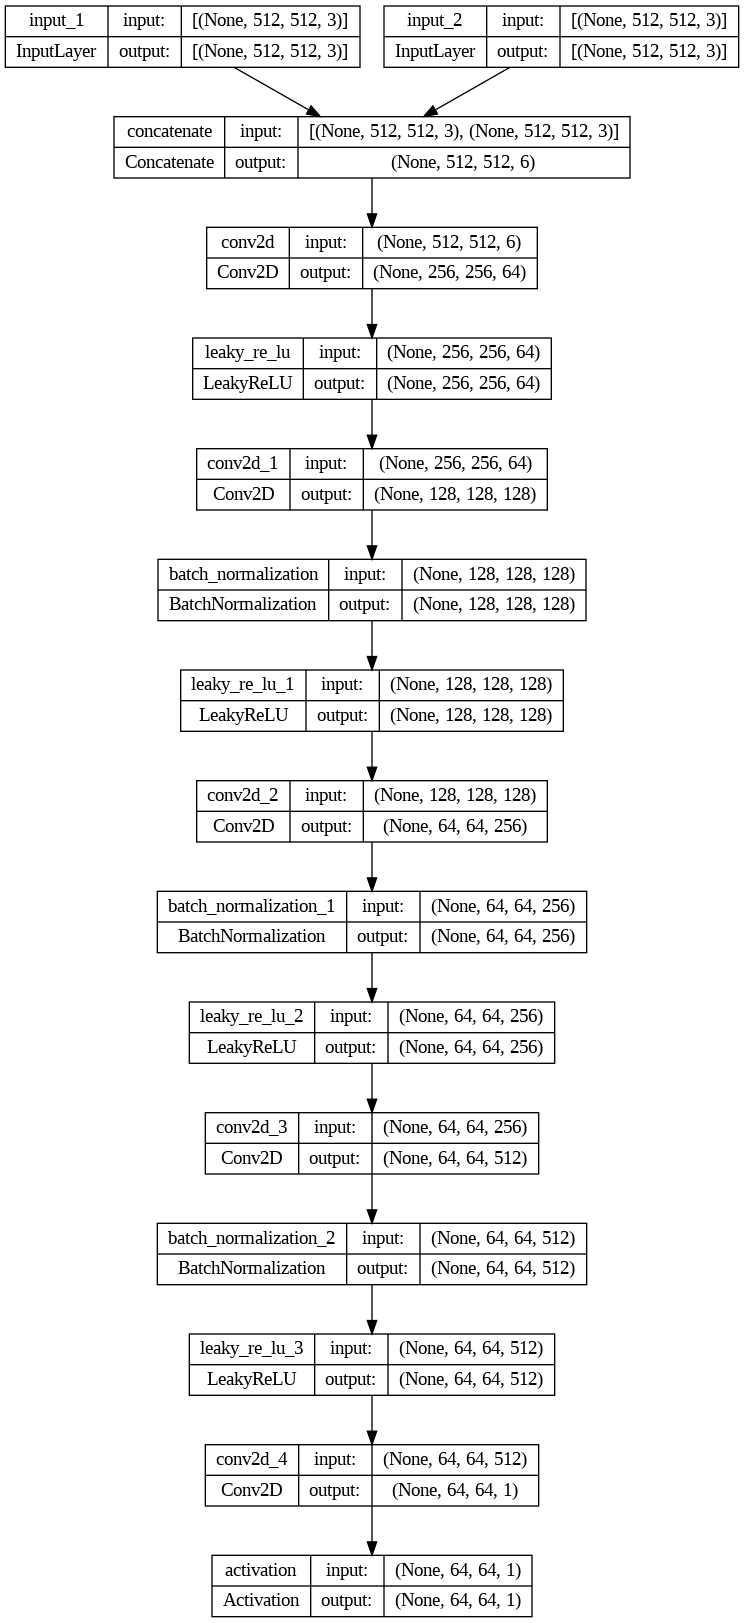

In [ ]:
plot_model(d_model,show_shapes=True)

In [ ]:
g_model = define_generator(image_shape)

In [ ]:
print(g_model.history)

None


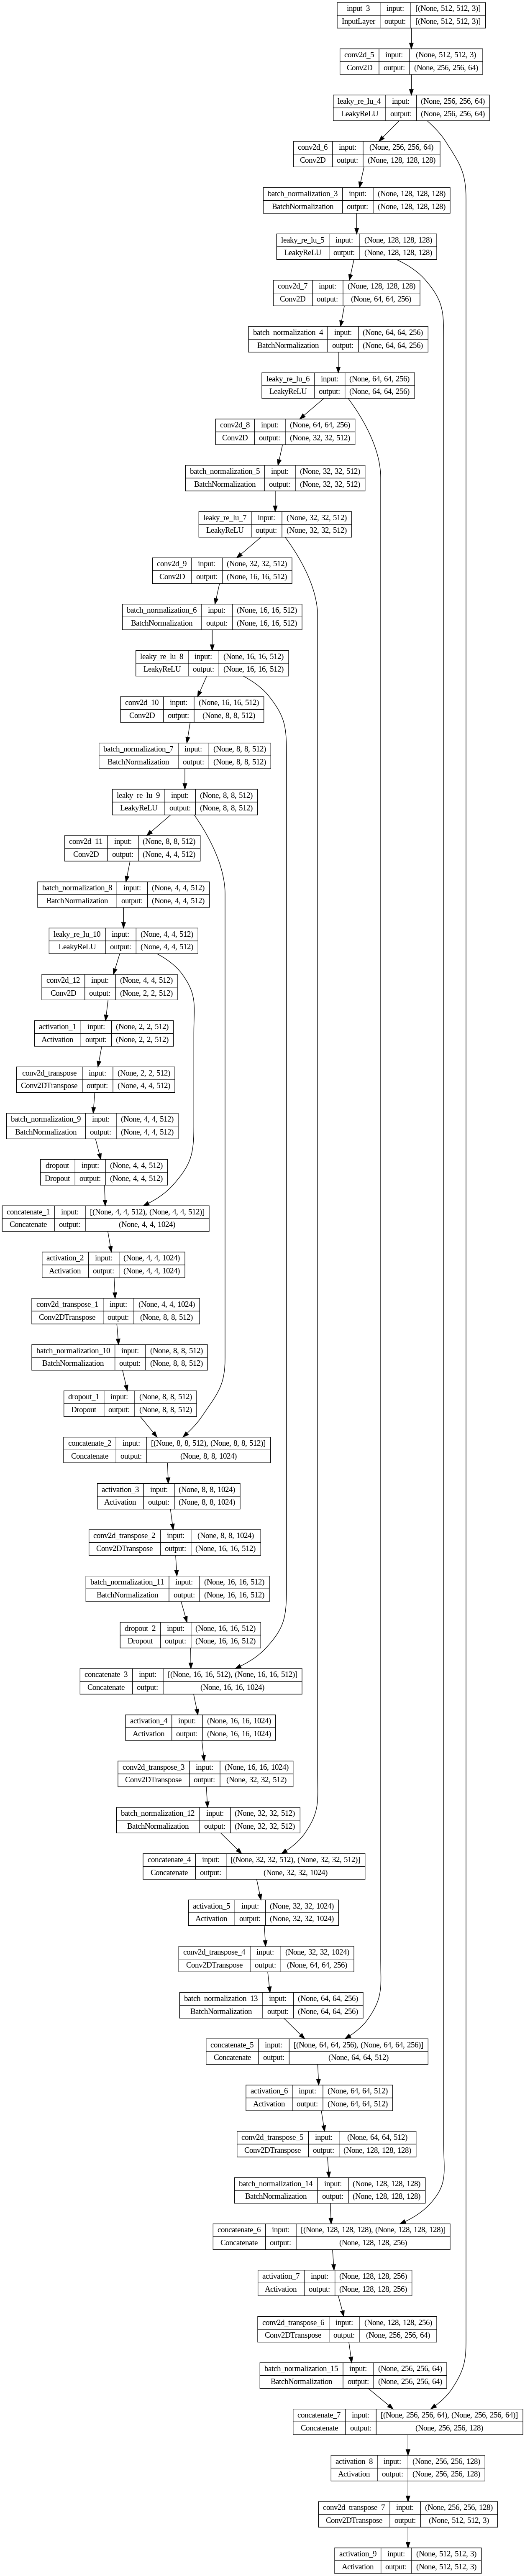

In [ ]:
plot_model(g_model,show_shapes=True)

In [ ]:
gan_model = define_gan(g_model, d_model, image_shape)

In [ ]:
def preprocess_data(X,y):
	# unpack data
	X1, X2 = X,y
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [ ]:
dataset = preprocess_data(X,y)

In [ ]:
train(d_model, g_model, gan_model, dataset, n_epochs=50, n_batch=1)

1/1 [==============================] - 0s 57ms/step
>1, d1[0.464] d2[0.439] g[28.053]
1/1 [==============================] - 0s 110ms/step
>2, d1[0.439] d2[0.453] g[34.847]
1/1 [==============================] - 0s 23ms/step
>3, d1[0.394] d2[0.421] g[30.537]
1/1 [==============================] - 0s 38ms/step
>4, d1[0.455] d2[0.455] g[24.864]
1/1 [==============================] - 0s 24ms/step
>5, d1[0.431] d2[0.443] g[24.886]
1/1 [==============================] - 0s 26ms/step
>6, d1[0.403] d2[0.434] g[26.374]
1/1 [==============================] - 0s 31ms/step
>7, d1[0.424] d2[0.433] g[24.786]
1/1 [==============================] - 0s 25ms/step
>8, d1[0.413] d2[0.415] g[31.402]
1/1 [==============================] - 0s 23ms/step
>9, d1[0.402] d2[0.470] g[23.717]
1/1 [==============================] - 0s 24ms/step
>10, d1[0.409] d2[0.393] g[22.284]
1/1 [==============================] - 0s 26ms/step
>11, d1[0.421] d2[0.418] g[21.180]
1/1 [==============================] - 0s 25ms/step

>1500, d1[0.348] d2[0.359] g[2.682]


### **Model Prediction**

In [ ]:
from numpy import vstack
from keras.models import load_model

In [ ]:
model = load_model('/content/model.h5')

1/1 [==============================] - 0s 43ms/step


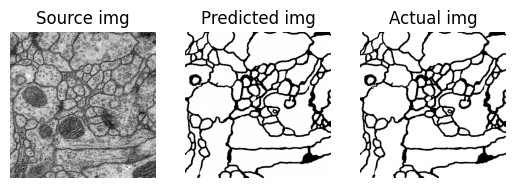

1/1 [==============================] - 0s 114ms/step


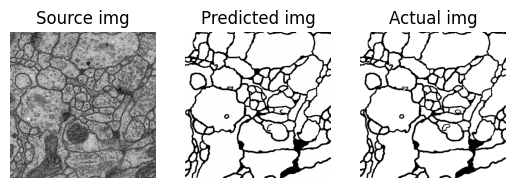

1/1 [==============================] - 0s 24ms/step


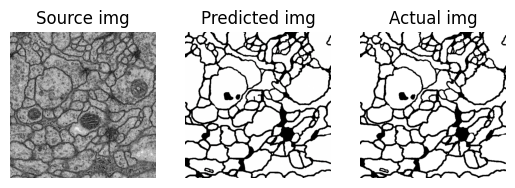

1/1 [==============================] - 0s 26ms/step


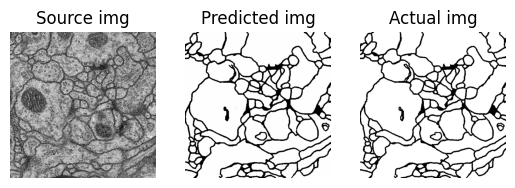

1/1 [==============================] - 0s 24ms/step


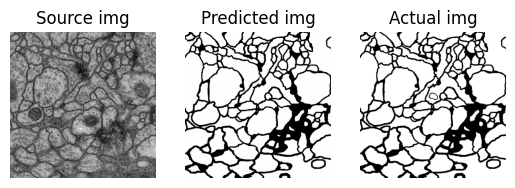

In [ ]:
[X1, X2] = dataset
for i in range(5):
    # select random example
    ix = randint(0, len(X1), 1)
    src_image, tar_image = X1[ix], X2[ix]
    # generate image from source
    gen_image = model.predict(src_image)
    # plot all three images
    images = vstack((src_image, gen_image, tar_image))
    images = (images + 1) / 2.0
    titles = ['Source img', 'Predicted img', 'Actual img']
    for i in range(len(images)):
        plt.subplot(1, 3, 1 + i)
        plt.axis('off')
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

### **model performance metrics**

In [ ]:
n_epochs=51

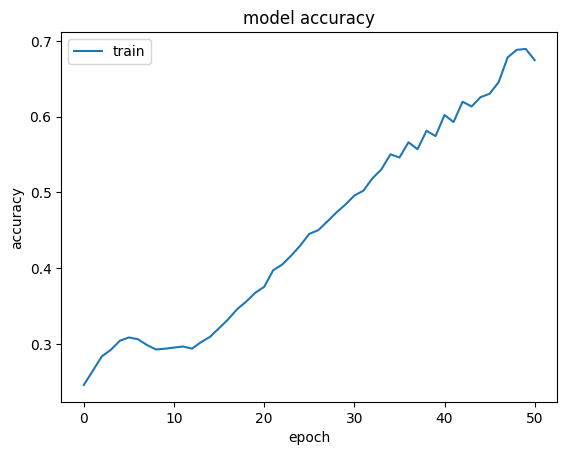

In [ ]:
# summarize history for accuracy
accuracy=[]
for i in range(n_epochs*30):
    if i%30==0:
        accuracy.append(np.mean(acc[i:i+30]))
plt.plot(accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

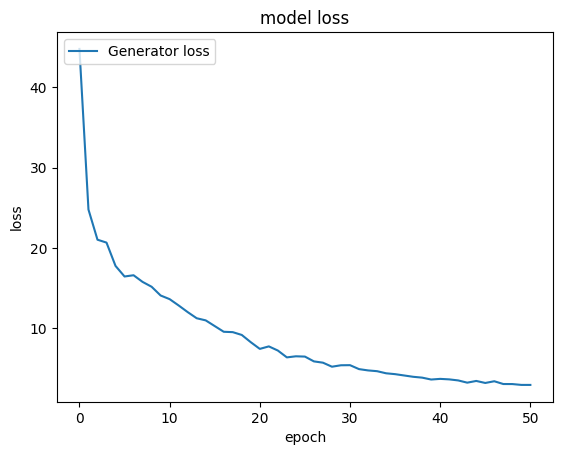

In [ ]:
# summarize loss
gen_lo=[]
for i in range(n_epochs*30):
    if i%30==0:
        gen_lo.append(np.mean(gen_loss[i:i+30]))
plt.plot(gen_lo)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Generator loss'], loc='upper left')
plt.show()